# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0.1


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2048654
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 49 54 58 66 60 68 64 55 63]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [63 49 54 58 66 60 68 64 55 63]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


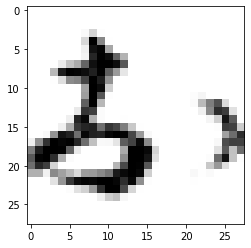

LABEL: 0
INPUT:


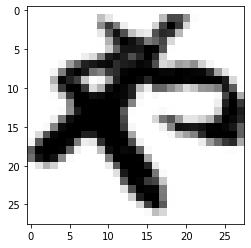

LABEL: 7
INPUT:


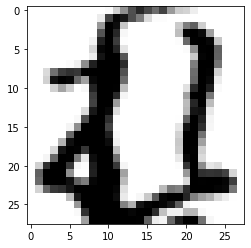

LABEL: 8


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,),
                                     (20,20,), (40,20,10),
                                     (50, 40, 30),
                                     (10, 4, 3),
                                     (35, 30, 35),
                                     (23,), (29, 28,),
                                     (21, 34)]}

#parameters = {'hidden_layer_sizes': [(i,j,k,) for i in range(33,37,1)
#                                              for j in range(28,32,1)
#                                              for k in range(33,37,1) ]}

#parameters = {'hidden_layer_sizes': [(i,) for i in range(10,40)]}
#parameters = {'hidden_layer_sizes': [(i,j,) for i in range(20,30,1)
#                                            for j in range(30,40,1)]}

mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
# increasing max iteration to avoid warning

#ADD YOUR CODE
clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf.best_params_)
best_layer_size = clf.best_params_['hidden_layer_sizes']

print("Score with best parameters:")
#ADD YOUR CODE
print(clf.best_score_)


print("\nAll scores on the grid:")
#ADD YOUR CODE
#print(clf.cv_results_)

# using pandas for better view
MLPResults = pd.DataFrame.from_dict(clf.cv_results_)
MLPResults

RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (35, 30, 35)}
Score with best parameters:
0.7583333333333333

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.257995,0.034212,0.000536,0.000032,"(10,)","{'hidden_layer_sizes': (10,)}",0.741667,0.691667,0.708333,0.633333,0.700000,0.695000,0.035198,9
1,0.201615,0.027987,0.000507,0.000020,"(20,)","{'hidden_layer_sizes': (20,)}",0.766667,0.733333,0.725000,0.633333,0.733333,0.718333,0.044845,6
2,0.218415,0.010377,0.000583,0.000038,"(40,)","{'hidden_layer_sizes': (40,)}",0.775000,0.750000,0.741667,0.666667,0.766667,0.740000,0.038514,5
3,0.239767,0.043949,0.000771,0.000262,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.766667,0.700000,0.708333,0.641667,0.725000,0.708333,0.040483,8
4,0.294213,0.049247,0.000602,0.000037,"(40, 20, 10)","{'hidden_layer_sizes': (40, 20, 10)}",0.675000,0.700000,0.658333,0.666667,0.733333,0.686667,0.027183,10
5,0.240070,0.051348,0.000653,0.000044,"(50, 40, 30)","{'hidden_layer_sizes': (50, 40, 30)}",0.766667,0.708333,0.733333,0.658333,0.708333,0.715000,0.035512,7
6,0.179141,0.067632,0.000479,0.000009,"(10, 4, 3)","{'hidden_layer_sizes': (10, 4, 3)}",0.408333,0.450000,0.183333,0.366667,0.291667,0.340000,0.094192,11
7,0.168928,0.007893,0.000646,0.000100,"(35, 30, 35)","{'hidden_layer_sizes': (35, 30, 35)}",0.816667,0.741667,0.791667,0.666667,0.775000,0.758333,0.051908,1
8,0.271302,0.072018,0.000600,0.000131,"(23,)","{'hidden_layer_sizes': (23,)}",0.808333,0.741667,0.750000,0.708333,0.750000,0.751667,0.032232,4
9,0.186875,0.033232,0.000672,0.000213,"(29, 28)","{'hidden_layer_sizes': (29, 28)}",0.791667,0.741667,0.808333,0.683333,0.758333,0.756667,0.043589,2


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
#parameters = {'batch_size': [1, 32, 97, 145, 429, 480]}
#parameters = {'batch_size': [i for i in range(200, 480)]}
parameters = {'batch_size': [32, 97, 145, 429]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

#ADD YOUR CODE
# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1,
                    hidden_layer_sizes=best_layer_size)

#ADD YOUR CODE
clf = GridSearchCV(mlp, parameters, cv=kf)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf.best_params_)
best_batch_size = clf.best_params_['batch_size']

print("Score with best parameters:")
#ADD YOUR CODE
print(clf.best_score_)


print("\nAll scores on the grid:")
#ADD YOUR CODE
#print(clf.cv_results_)

# using pandas for better view
MLPResults = pd.DataFrame.from_dict(clf.cv_results_)
MLPResults

RESULTS FOR NN

Best parameters set found:
{'batch_size': 429}
Score with best parameters:
0.7649999999999999

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.382718,0.096560,0.000679,0.000066,32,{'batch_size': 32},0.741667,0.625000,0.733333,0.608333,0.716667,0.685000,0.056618,4
1,0.171743,0.005216,0.000643,0.000028,97,{'batch_size': 97},0.841667,0.741667,0.750000,0.675000,0.766667,0.755000,0.053385,3
2,0.179403,0.013232,0.000622,0.000053,145,{'batch_size': 145},0.816667,0.750000,0.766667,0.658333,0.800000,0.758333,0.055277,2
3,0.225465,0.019234,0.000646,0.000017,429,{'batch_size': 429},0.850000,0.758333,0.766667,0.691667,0.758333,0.765000,0.050387,1


Trying to to perform the Grid Search making letting both of the parameters free to vary

In [10]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,),
                                     (20,20,), (40,20,10),
                                     (50, 40, 30),
                                     (10, 4, 3),
                                     (35, 30, 35),
                                     (23,), (29, 28,),
                                     (21, 34)],
              'batch_size': [32, 97, 145, 429]}

mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)
# increasing max iteration to avoid warning

#ADD YOUR CODE
clf = GridSearchCV(mlp, parameters, cv=5)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf.best_params_)
best_layer_size = clf.best_params_['hidden_layer_sizes']
best_batch_size = clf.best_params_['batch_size']

print("Score with best parameters:")
#ADD YOUR CODE
print(clf.best_score_)


print("\nAll scores on the grid:")
#ADD YOUR CODE
#print(clf.cv_results_)

# using pandas for better view
MLPResults = pd.DataFrame.from_dict(clf.cv_results_)
MLPResults

RESULTS FOR NN

Best parameters set found:
{'batch_size': 145, 'hidden_layer_sizes': (23,)}
Score with best parameters:
0.7566666666666666

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.361247,0.121630,0.000699,0.000387,32,"(10,)","{'batch_size': 32, 'hidden_layer_sizes': (10,)}",0.700000,0.625000,0.725000,0.600000,0.691667,0.668333,0.047551,34
1,0.213977,0.015320,0.000517,0.000025,32,"(20,)","{'batch_size': 32, 'hidden_layer_sizes': (20,)}",0.783333,0.733333,0.725000,0.675000,0.750000,0.733333,0.035355,18
2,0.241712,0.017387,0.000576,0.000022,32,"(40,)","{'batch_size': 32, 'hidden_layer_sizes': (40,)}",0.766667,0.766667,0.775000,0.641667,0.808333,0.751667,0.057106,4
3,0.254285,0.063708,0.000718,0.000147,32,"(20, 20)","{'batch_size': 32, 'hidden_layer_sizes': (20, ...",0.583333,0.633333,0.708333,0.616667,0.733333,0.655000,0.056667,37
4,0.377014,0.089979,0.000968,0.000424,32,"(40, 20, 10)","{'batch_size': 32, 'hidden_layer_sizes': (40, ...",0.108333,0.466667,0.408333,0.558333,0.575000,0.423333,0.168852,41
5,0.429230,0.111336,0.000743,0.000029,32,"(50, 40, 30)","{'batch_size': 32, 'hidden_layer_sizes': (50, ...",0.741667,0.625000,0.666667,0.641667,0.758333,0.686667,0.053645,29
6,0.232735,0.061334,0.000617,0.000019,32,"(10, 4, 3)","{'batch_size': 32, 'hidden_layer_sizes': (10, ...",0.216667,0.108333,0.375000,0.391667,0.383333,0.295000,0.113603,44
7,0.404084,0.101760,0.000691,0.000011,32,"(35, 30, 35)","{'batch_size': 32, 'hidden_layer_sizes': (35, ...",0.675000,0.575000,0.650000,0.575000,0.675000,0.630000,0.045826,38
8,0.242111,0.015093,0.000629,0.000073,32,"(23,)","{'batch_size': 32, 'hidden_layer_sizes': (23,)}",0.816667,0.758333,0.766667,0.700000,0.733333,0.755000,0.038586,2
9,0.317122,0.088200,0.000735,0.000147,32,"(29, 28)","{'batch_size': 32, 'hidden_layer_sizes': (29, ...",0.750000,0.575000,0.608333,0.641667,0.725000,0.660000,0.067165,36


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]
The best architecture is the one with three layers of 35, 30 and 35 nodes each.
Whatching the simpler ones, with only one layer, for the ones with fewer neurons we see probabily an underfit of the data, leading to bad results in terms of score, while the more complex ones, with more nodes are probabily overfitting the data leading to bad results too.

For what concerns the mini-batch size parameter the best result is 429. Using a minibatch size of 1 the algorithm converges very slowly and has bad performances, while using a minibatch size high, which corresponds to the standard gradient descent, we get results not satisfying.

Since I was warried that the results i got where not satifying i performed a grid search letting both of the parameters described above vary: i find this results more familiar, in particular about the architecture which is more simple, not having to be too warried about overfitting phenomena

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.65 sec

Training MLP of size (20,) ...
Done, training time: 0.45 sec

Training MLP of size (40,) ...
Done, training time: 0.57 sec

Training MLP of size (20, 20) ...
Done, training time: 0.65 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 0.88 sec

Training MLP of size (50, 40, 30) ...
Done, training time: 0.59 sec

Training MLP of size (10, 4, 3) ...
Done, training time: 0.37 sec

Training MLP of size (35, 30, 35) ...
Done, training time: 0.60 sec

Training MLP of size (23,) ...
Done, training time: 0.48 sec

Training MLP of size (29, 28) ...
Done, training time: 0.49 sec

Training MLP of size (21, 34) ...
Done, training time: 0.47 sec



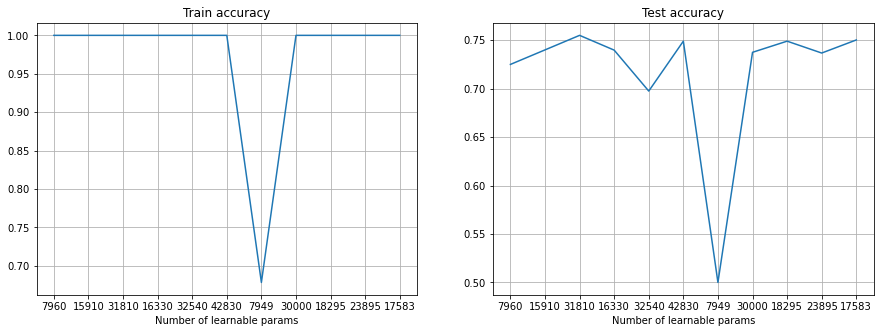

In [11]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

#hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10), (50, 40, 30), (10, 4, 3), (35, 30, 35),(23,), (29, 28,),(21, 34)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        learning_rate_init=.1,
                        hidden_layer_sizes=hl_size,
                        n_iter_no_change=50,
                        batch_size=best_batch_size)

    #ADD YOUR CODE
    mlp.fit(X_train, y_train)

    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]
The simplest model, which is the one with only one layer of 10 neurons, has a pretty bad result considering the test accuracy, probabily due to an underfit. Increasing the number of neurons, but maintaning the number of layer, one can see that the curve has a maximum, corresponding to the best parameter (23) and then start to decrease. This means that we start to have an overfit in the data. So we do not have that increasing the number of neurons we have better and better results.



### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

In [12]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
scores = {}
parameters = {'learning_rate_init': lr_list}

#ADD YOUR CODE
mlp = MLPClassifier(max_iter=4000, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    hidden_layer_sizes=best_layer_size,
                    batch_size=best_batch_size,
                    n_iter_no_change=50)
clf = GridSearchCV(mlp, parameters, cv=5, verbose=3,
                   return_train_score = True)
clf.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:")
#ADD YOUR CODE
print(clf.best_params_)
#best_learning_rate = clf.best_params_['learning_rate_init']
best_learning_rate = 0.02

print("Score with best parameters:")
#ADD YOUR CODE
print(clf.best_score_)


print("\nAll scores on the grid:")
#ADD YOUR CODE
#print(clf.cv_results_)

# using pandas for better view
MLPResults = pd.DataFrame.from_dict(clf.cv_results_)
MLPResults


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END learning_rate_init=0.0002;, score=(train=0.996, test=0.775) total time=  10.6s
[CV 2/5] END learning_rate_init=0.0002;, score=(train=0.994, test=0.708) total time=  10.6s
[CV 3/5] END learning_rate_init=0.0002;, score=(train=0.996, test=0.725) total time=  10.5s
[CV 4/5] END learning_rate_init=0.0002;, score=(train=0.992, test=0.683) total time=  10.1s
[CV 5/5] END learning_rate_init=0.0002;, score=(train=0.992, test=0.742) total time=  11.1s
[CV 1/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.767) total time=   2.6s
[CV 2/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.717) total time=   3.0s
[CV 3/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.750) total time=   2.7s
[CV 4/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.683) total time=   2.8s
[CV 5/5] END learning_rate_init=0.002;, score=(train=1.000, test=0.742) total time=   3.0s
[CV 1/5] END learning_rat

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.561485,0.318181,0.000693,0.000116,0.0002,{'learning_rate_init': 0.0002},0.775000,0.708333,0.725000,0.683333,...,0.726667,0.030912,4,0.995833,0.99375,0.995833,0.991667,0.991667,0.99375,0.001863
1,2.807357,0.166293,0.000844,0.000501,0.002,{'learning_rate_init': 0.002},0.766667,0.716667,0.750000,0.683333,...,0.731667,0.029059,3,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,0.000000
2,0.816977,0.141911,0.000654,0.000166,0.02,{'learning_rate_init': 0.02},0.783333,0.741667,0.758333,0.691667,...,0.741667,0.030277,2,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,0.000000
3,0.334412,0.066908,0.000713,0.000175,0.2,{'learning_rate_init': 0.2},0.808333,0.766667,0.758333,0.675000,...,0.745000,0.045522,1,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,0.000000


Iteration 1, loss = 2.35657272
Iteration 2, loss = 2.35245428
Iteration 3, loss = 2.34644142
Iteration 4, loss = 2.33968101
Iteration 5, loss = 2.33214669
Iteration 6, loss = 2.32527037
Iteration 7, loss = 2.31796229
Iteration 8, loss = 2.31138191
Iteration 9, loss = 2.30450833
Iteration 10, loss = 2.29817862
Iteration 11, loss = 2.29219546
Iteration 12, loss = 2.28644342
Iteration 13, loss = 2.28043568
Iteration 14, loss = 2.27474980
Iteration 15, loss = 2.26930006
Iteration 16, loss = 2.26396981
Iteration 17, loss = 2.25903446
Iteration 18, loss = 2.25374473
Iteration 19, loss = 2.24858446
Iteration 20, loss = 2.24369077
Iteration 21, loss = 2.23890335
Iteration 22, loss = 2.23400355
Iteration 23, loss = 2.22929188
Iteration 24, loss = 2.22435442
Iteration 25, loss = 2.21977662
Iteration 26, loss = 2.21505433
Iteration 27, loss = 2.21058427
Iteration 28, loss = 2.20610776
Iteration 29, loss = 2.20165609
Iteration 30, loss = 2.19713120
Iteration 31, loss = 2.19260089
Iteration 32, los

Iteration 262, loss = 1.27286268
Iteration 263, loss = 1.27030454
Iteration 264, loss = 1.26785450
Iteration 265, loss = 1.26527857
Iteration 266, loss = 1.26281145
Iteration 267, loss = 1.26029171
Iteration 268, loss = 1.25780535
Iteration 269, loss = 1.25529730
Iteration 270, loss = 1.25285123
Iteration 271, loss = 1.25035550
Iteration 272, loss = 1.24788405
Iteration 273, loss = 1.24535058
Iteration 274, loss = 1.24293308
Iteration 275, loss = 1.24047374
Iteration 276, loss = 1.23807414
Iteration 277, loss = 1.23569964
Iteration 278, loss = 1.23331117
Iteration 279, loss = 1.23099143
Iteration 280, loss = 1.22857302
Iteration 281, loss = 1.22616060
Iteration 282, loss = 1.22378839
Iteration 283, loss = 1.22146704
Iteration 284, loss = 1.21910653
Iteration 285, loss = 1.21682000
Iteration 286, loss = 1.21450625
Iteration 287, loss = 1.21222878
Iteration 288, loss = 1.20991027
Iteration 289, loss = 1.20764194
Iteration 290, loss = 1.20542816
Iteration 291, loss = 1.20318938
Iteration 

Iteration 518, loss = 0.85811971
Iteration 519, loss = 0.85707325
Iteration 520, loss = 0.85599413
Iteration 521, loss = 0.85493648
Iteration 522, loss = 0.85386890
Iteration 523, loss = 0.85279758
Iteration 524, loss = 0.85167693
Iteration 525, loss = 0.85066605
Iteration 526, loss = 0.84959478
Iteration 527, loss = 0.84851537
Iteration 528, loss = 0.84749967
Iteration 529, loss = 0.84645077
Iteration 530, loss = 0.84547393
Iteration 531, loss = 0.84449760
Iteration 532, loss = 0.84351618
Iteration 533, loss = 0.84248462
Iteration 534, loss = 0.84153334
Iteration 535, loss = 0.84048431
Iteration 536, loss = 0.83947042
Iteration 537, loss = 0.83846973
Iteration 538, loss = 0.83743447
Iteration 539, loss = 0.83648454
Iteration 540, loss = 0.83535761
Iteration 541, loss = 0.83436564
Iteration 542, loss = 0.83332353
Iteration 543, loss = 0.83229640
Iteration 544, loss = 0.83127268
Iteration 545, loss = 0.83030862
Iteration 546, loss = 0.82933844
Iteration 547, loss = 0.82843754
Iteration 

Iteration 774, loss = 0.64823421
Iteration 775, loss = 0.64758213
Iteration 776, loss = 0.64694650
Iteration 777, loss = 0.64629255
Iteration 778, loss = 0.64567551
Iteration 779, loss = 0.64502174
Iteration 780, loss = 0.64434732
Iteration 781, loss = 0.64379919
Iteration 782, loss = 0.64305284
Iteration 783, loss = 0.64238812
Iteration 784, loss = 0.64173390
Iteration 785, loss = 0.64118522
Iteration 786, loss = 0.64054881
Iteration 787, loss = 0.63987970
Iteration 788, loss = 0.63927874
Iteration 789, loss = 0.63868179
Iteration 790, loss = 0.63805647
Iteration 791, loss = 0.63739939
Iteration 792, loss = 0.63675457
Iteration 793, loss = 0.63605499
Iteration 794, loss = 0.63545064
Iteration 795, loss = 0.63483228
Iteration 796, loss = 0.63421345
Iteration 797, loss = 0.63358815
Iteration 798, loss = 0.63299543
Iteration 799, loss = 0.63235526
Iteration 800, loss = 0.63183449
Iteration 801, loss = 0.63107583
Iteration 802, loss = 0.63043275
Iteration 803, loss = 0.62983156
Iteration 

Iteration 1034, loss = 0.50846828
Iteration 1035, loss = 0.50804712
Iteration 1036, loss = 0.50760442
Iteration 1037, loss = 0.50712183
Iteration 1038, loss = 0.50669122
Iteration 1039, loss = 0.50622954
Iteration 1040, loss = 0.50581009
Iteration 1041, loss = 0.50534227
Iteration 1042, loss = 0.50494344
Iteration 1043, loss = 0.50446470
Iteration 1044, loss = 0.50398761
Iteration 1045, loss = 0.50356113
Iteration 1046, loss = 0.50309412
Iteration 1047, loss = 0.50266359
Iteration 1048, loss = 0.50227340
Iteration 1049, loss = 0.50179087
Iteration 1050, loss = 0.50128504
Iteration 1051, loss = 0.50093361
Iteration 1052, loss = 0.50052513
Iteration 1053, loss = 0.50016125
Iteration 1054, loss = 0.49971078
Iteration 1055, loss = 0.49925870
Iteration 1056, loss = 0.49880466
Iteration 1057, loss = 0.49836716
Iteration 1058, loss = 0.49793569
Iteration 1059, loss = 0.49749615
Iteration 1060, loss = 0.49699369
Iteration 1061, loss = 0.49664265
Iteration 1062, loss = 0.49624587
Iteration 1063

Iteration 1275, loss = 0.41365880
Iteration 1276, loss = 0.41329545
Iteration 1277, loss = 0.41294756
Iteration 1278, loss = 0.41258536
Iteration 1279, loss = 0.41221588
Iteration 1280, loss = 0.41190120
Iteration 1281, loss = 0.41157326
Iteration 1282, loss = 0.41116808
Iteration 1283, loss = 0.41080883
Iteration 1284, loss = 0.41052689
Iteration 1285, loss = 0.41011466
Iteration 1286, loss = 0.40977587
Iteration 1287, loss = 0.40943259
Iteration 1288, loss = 0.40911406
Iteration 1289, loss = 0.40878664
Iteration 1290, loss = 0.40841787
Iteration 1291, loss = 0.40810630
Iteration 1292, loss = 0.40775564
Iteration 1293, loss = 0.40742530
Iteration 1294, loss = 0.40705394
Iteration 1295, loss = 0.40669020
Iteration 1296, loss = 0.40633410
Iteration 1297, loss = 0.40595742
Iteration 1298, loss = 0.40564608
Iteration 1299, loss = 0.40529459
Iteration 1300, loss = 0.40491524
Iteration 1301, loss = 0.40460074
Iteration 1302, loss = 0.40423721
Iteration 1303, loss = 0.40388302
Iteration 1304

Iteration 1525, loss = 0.33632324
Iteration 1526, loss = 0.33605539
Iteration 1527, loss = 0.33582748
Iteration 1528, loss = 0.33555903
Iteration 1529, loss = 0.33531894
Iteration 1530, loss = 0.33506577
Iteration 1531, loss = 0.33481237
Iteration 1532, loss = 0.33455698
Iteration 1533, loss = 0.33427130
Iteration 1534, loss = 0.33400444
Iteration 1535, loss = 0.33373580
Iteration 1536, loss = 0.33347347
Iteration 1537, loss = 0.33323404
Iteration 1538, loss = 0.33297503
Iteration 1539, loss = 0.33269264
Iteration 1540, loss = 0.33245210
Iteration 1541, loss = 0.33218704
Iteration 1542, loss = 0.33192549
Iteration 1543, loss = 0.33163518
Iteration 1544, loss = 0.33140078
Iteration 1545, loss = 0.33113663
Iteration 1546, loss = 0.33088225
Iteration 1547, loss = 0.33061529
Iteration 1548, loss = 0.33036042
Iteration 1549, loss = 0.33012700
Iteration 1550, loss = 0.32985666
Iteration 1551, loss = 0.32961091
Iteration 1552, loss = 0.32935961
Iteration 1553, loss = 0.32913274
Iteration 1554

Iteration 1789, loss = 0.27437663
Iteration 1790, loss = 0.27412968
Iteration 1791, loss = 0.27392063
Iteration 1792, loss = 0.27369864
Iteration 1793, loss = 0.27349192
Iteration 1794, loss = 0.27327657
Iteration 1795, loss = 0.27307740
Iteration 1796, loss = 0.27286632
Iteration 1797, loss = 0.27265260
Iteration 1798, loss = 0.27245556
Iteration 1799, loss = 0.27225770
Iteration 1800, loss = 0.27205264
Iteration 1801, loss = 0.27186426
Iteration 1802, loss = 0.27161841
Iteration 1803, loss = 0.27143170
Iteration 1804, loss = 0.27122070
Iteration 1805, loss = 0.27104186
Iteration 1806, loss = 0.27083716
Iteration 1807, loss = 0.27063741
Iteration 1808, loss = 0.27039715
Iteration 1809, loss = 0.27020259
Iteration 1810, loss = 0.27002309
Iteration 1811, loss = 0.26981762
Iteration 1812, loss = 0.26957929
Iteration 1813, loss = 0.26939441
Iteration 1814, loss = 0.26921662
Iteration 1815, loss = 0.26901472
Iteration 1816, loss = 0.26882545
Iteration 1817, loss = 0.26861963
Iteration 1818

/home/aidin/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 31, loss = 1.23177975
Iteration 32, loss = 1.20752231
Iteration 33, loss = 1.18539137
Iteration 34, loss = 1.16467671
Iteration 35, loss = 1.14429399
Iteration 36, loss = 1.12453074
Iteration 37, loss = 1.10723777
Iteration 38, loss = 1.08804000
Iteration 39, loss = 1.07059560
Iteration 40, loss = 1.05353895
Iteration 41, loss = 1.03721180
Iteration 42, loss = 1.02206921
Iteration 43, loss = 1.00623007
Iteration 44, loss = 0.99156938
Iteration 45, loss = 0.97824668
Iteration 46, loss = 0.96490374
Iteration 47, loss = 0.95169310
Iteration 48, loss = 0.93877765
Iteration 49, loss = 0.92682253
Iteration 50, loss = 0.91440978
Iteration 51, loss = 0.90195089
Iteration 52, loss = 0.89014430
Iteration 53, loss = 0.87902717
Iteration 54, loss = 0.86909614
Iteration 55, loss = 0.85953512
Iteration 56, loss = 0.84908180
Iteration 57, loss = 0.83913305
Iteration 58, loss = 0.82810674
Iteration 59, loss = 0.81842258
Iteration 60, loss = 0.80881657
Iteration 61, loss = 0.80028694
Iteratio

Iteration 293, loss = 0.13204599
Iteration 294, loss = 0.13128123
Iteration 295, loss = 0.13060431
Iteration 296, loss = 0.12977825
Iteration 297, loss = 0.12915117
Iteration 298, loss = 0.12826426
Iteration 299, loss = 0.12751287
Iteration 300, loss = 0.12689573
Iteration 301, loss = 0.12620894
Iteration 302, loss = 0.12559835
Iteration 303, loss = 0.12481302
Iteration 304, loss = 0.12422330
Iteration 305, loss = 0.12351621
Iteration 306, loss = 0.12282201
Iteration 307, loss = 0.12223628
Iteration 308, loss = 0.12144815
Iteration 309, loss = 0.12089787
Iteration 310, loss = 0.12021139
Iteration 311, loss = 0.11955961
Iteration 312, loss = 0.11887814
Iteration 313, loss = 0.11811743
Iteration 314, loss = 0.11742324
Iteration 315, loss = 0.11692343
Iteration 316, loss = 0.11616683
Iteration 317, loss = 0.11545494
Iteration 318, loss = 0.11479531
Iteration 319, loss = 0.11415459
Iteration 320, loss = 0.11386327
Iteration 321, loss = 0.11322359
Iteration 322, loss = 0.11249972
Iteration 

Iteration 552, loss = 0.04353401
Iteration 553, loss = 0.04338422
Iteration 554, loss = 0.04324200
Iteration 555, loss = 0.04310957
Iteration 556, loss = 0.04299171
Iteration 557, loss = 0.04285093
Iteration 558, loss = 0.04273784
Iteration 559, loss = 0.04261251
Iteration 560, loss = 0.04243345
Iteration 561, loss = 0.04232045
Iteration 562, loss = 0.04220801
Iteration 563, loss = 0.04209229
Iteration 564, loss = 0.04200838
Iteration 565, loss = 0.04188827
Iteration 566, loss = 0.04175024
Iteration 567, loss = 0.04161850
Iteration 568, loss = 0.04149663
Iteration 569, loss = 0.04135396
Iteration 570, loss = 0.04120738
Iteration 571, loss = 0.04108058
Iteration 572, loss = 0.04095088
Iteration 573, loss = 0.04083258
Iteration 574, loss = 0.04069161
Iteration 575, loss = 0.04056357
Iteration 576, loss = 0.04042757
Iteration 577, loss = 0.04033468
Iteration 578, loss = 0.04020955
Iteration 579, loss = 0.04008616
Iteration 580, loss = 0.03996999
Iteration 581, loss = 0.03985070
Iteration 

Iteration 78, loss = 0.02632733
Iteration 79, loss = 0.02575166
Iteration 80, loss = 0.02533854
Iteration 81, loss = 0.02458696
Iteration 82, loss = 0.02398744
Iteration 83, loss = 0.02349008
Iteration 84, loss = 0.02301230
Iteration 85, loss = 0.02248670
Iteration 86, loss = 0.02208561
Iteration 87, loss = 0.02177015
Iteration 88, loss = 0.02137598
Iteration 89, loss = 0.02085442
Iteration 90, loss = 0.02041911
Iteration 91, loss = 0.02018006
Iteration 92, loss = 0.01996393
Iteration 93, loss = 0.01959569
Iteration 94, loss = 0.01925100
Iteration 95, loss = 0.01878222
Iteration 96, loss = 0.01842403
Iteration 97, loss = 0.01814005
Iteration 98, loss = 0.01780268
Iteration 99, loss = 0.01752997
Iteration 100, loss = 0.01732142
Iteration 101, loss = 0.01698369
Iteration 102, loss = 0.01671403
Iteration 103, loss = 0.01648746
Iteration 104, loss = 0.01623446
Iteration 105, loss = 0.01595038
Iteration 106, loss = 0.01570355
Iteration 107, loss = 0.01546372
Iteration 108, loss = 0.01527852

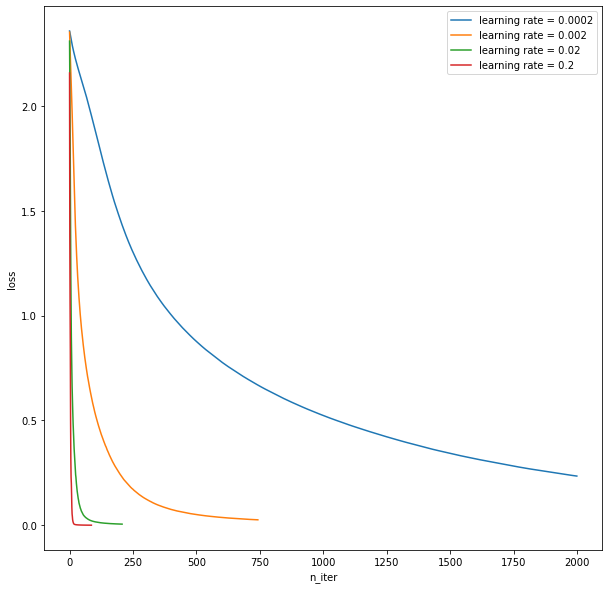

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
for l in lr_list:
    mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        hidden_layer_sizes=best_layer_size,
                        batch_size=best_batch_size,
                        n_iter_no_change=50,
                        learning_rate_init=l,
                        verbose=True)
    mlp.fit(X_train, y_train)
    ax.plot(mlp.loss_curve_, label = 'learning rate = ' + str(l))
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
ax.legend()
plt.show()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]
From the plot above one can see that while using the biggest learning rate leads to a quite immediate convergence the smallest one does not converge in the maximum number of iterations used. It is interesting to observe that using the other set of best parameters, found letting the two parameters vary one at the time, leads to different results in term of test error, giving best results for the 0.002 parameter instead.

In any case, i choose as best parameter 0.02, avoiding stability problem that I detect changin seed.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.255500


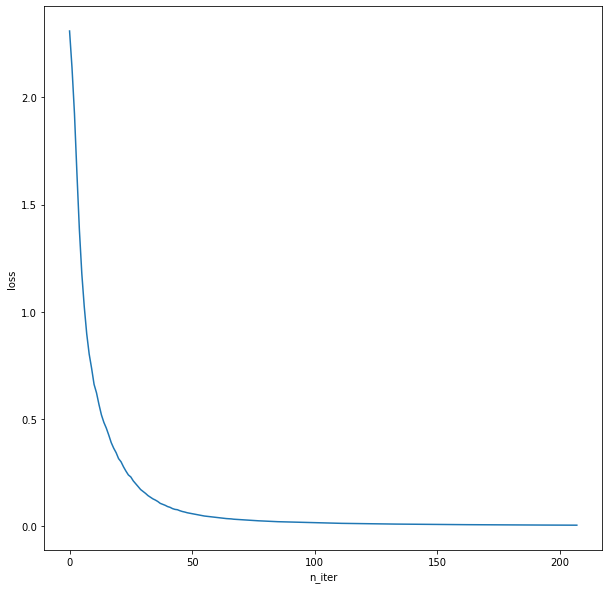

In [14]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                        tol=1e-4, random_state=ID,
                        hidden_layer_sizes=best_layer_size,
                        batch_size=best_batch_size,
                        n_iter_no_change=50,
                        #verbose=True,
                        learning_rate_init=best_learning_rate)
mlp.fit(X_train, y_train)

#ADD YOUR CODE
training_error = 1 - mlp.score(X_train, y_train)
test_error     = 1 - mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [496 503 521 493 534 487 511 481 494 480]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

Iteration 1, loss = 1.67811228
Iteration 2, loss = 0.85192741
Iteration 3, loss = 0.66524927
Iteration 4, loss = 0.57347980
Iteration 5, loss = 0.51281506
Iteration 6, loss = 0.46452171
Iteration 7, loss = 0.42980199
Iteration 8, loss = 0.39781303
Iteration 9, loss = 0.37421868
Iteration 10, loss = 0.35267791
Iteration 11, loss = 0.33185021
Iteration 12, loss = 0.31211805
Iteration 13, loss = 0.29461150
Iteration 14, loss = 0.27880749
Iteration 15, loss = 0.26320328
Iteration 16, loss = 0.24777682
Iteration 17, loss = 0.23644968
Iteration 18, loss = 0.22503936
Iteration 19, loss = 0.21409530
Iteration 20, loss = 0.20292248
Iteration 21, loss = 0.19155837
Iteration 22, loss = 0.18341186
Iteration 23, loss = 0.17530175
Iteration 24, loss = 0.16546770
Iteration 25, loss = 0.15646456
Iteration 26, loss = 0.14893743
Iteration 27, loss = 0.14197858
Iteration 28, loss = 0.13474126
Iteration 29, loss = 0.12886796
Iteration 30, loss = 0.12482723
Iteration 31, loss = 0.11676302
Iteration 32, los

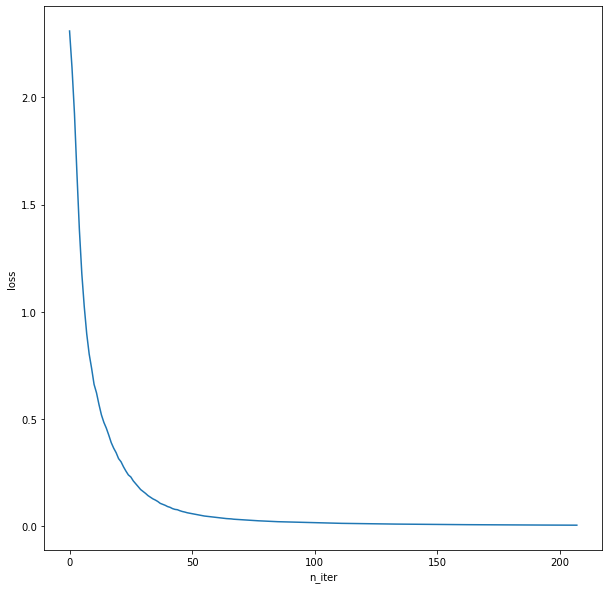

In [16]:
# use best architecture and params from before

#ADD YOUR CODE
mlp_large = MLPClassifier(max_iter=2000, alpha=1e-4, solver='sgd',
                          tol=1e-4, random_state=ID,
                          hidden_layer_sizes=best_layer_size,
                          batch_size=best_batch_size,
                          n_iter_no_change=50,
                          verbose=True,
                          learning_rate_init=best_learning_rate)
mlp_large.fit(X_train, y_train)


print ('\nRESULTS FOR NN\n')

#get training and test error for the NN

#ADD YOUR CODE
training_error = 1 - mlp_large.score(X_train, y_train)
test_error     = 1 - mlp_large.score(X_test, y_test)

print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(mlp.loss_curve_)
ax.set_xlabel('n_iter')
ax.set_ylabel('loss')
plt.show()


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

While the training error for both is 0, the test error, as we expected, is better using more samples for training ( 0.26 vs 0.16 ).

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

(55000, 784)
INPUT:


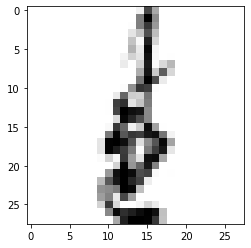

LABEL: 8
Index: 8
Large NN prediction:  8
NN prediction:  6
INPUT:


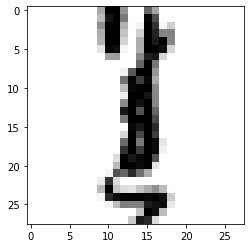

LABEL: 8
Index: 9
Large NN prediction:  8
NN prediction:  6
INPUT:


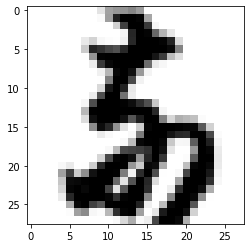

LABEL: 4
Index: 13
Large NN prediction:  4
NN prediction:  6
INPUT:


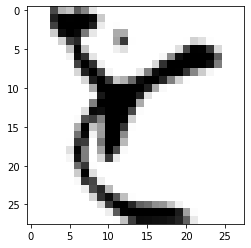

LABEL: 9
Index: 14
Large NN prediction:  9
NN prediction:  1
INPUT:


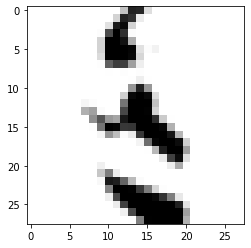

LABEL: 1
Index: 18
Large NN prediction:  1
NN prediction:  2
INPUT:


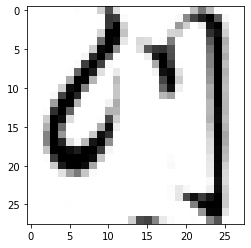

LABEL: 3
Index: 20
Large NN prediction:  3
NN prediction:  0


In [17]:
NN_prediction = mlp.predict(X_test)#ADD YOUR CODE
large_NN_prediction = mlp_large.predict(X_test)#ADD YOUR CODE


print(X_test.shape)

#ADD YOUR CODE
counter = 0
for index, input, prediction_large, prediction, label in zip(range(len(X_test)), X_test, large_NN_prediction, NN_prediction, y_test):
    if prediction != label and prediction_large == label:
        #print('input,',input, ', has been classified as', predictionLR, 'by the Logistic Regression and should be', label)
        plot_input(X_test, y_test, index)
        print('Index:', index)
        print("Large NN prediction: ", large_NN_prediction[index])
        print("NN prediction: ", NN_prediction[index])
        counter += 1
    if counter > 5:
        break




### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


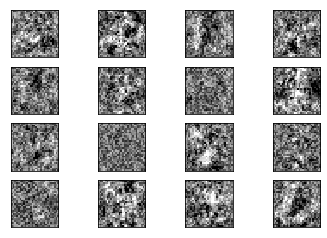

Weights with 5000 data points:


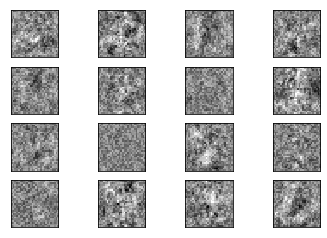

In [18]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()


print("Weights with 5000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]
Looking at the weights one can recognize some pattern of the japanese characters we are studying, while in others at naked eye one can't detect anything other than random noise.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [19]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:]#2*m_training]
y_train, y_test = y[:m_training], y[m_training:]#2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting
C_best      = 10
gamma_best  = 0.01

#ADD YOUR CODE
SVM = SVC(kernel = 'rbf', C = C_best, gamma = gamma_best)
SVM.fit(X_train, y_train)

print ('RESULTS FOR SVM')

SVM_training_error = 1 - SVM.score(X_train, y_train) #ADD YOUR CODE
print("Training score SVM:")
print(SVM_training_error)

SVM_test_error     = 1 - SVM.score(X_test,  y_test ) #ADD YOUR CODE
print("Test score SVM:")
print(SVM_test_error)




RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.08025454545454547


In [20]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1, max_iter=4000) #ADD YOUR CODE
regL2.fit(X_train, y_train)
# you can re-use your code from Lab 2

#ADD YOUR CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1-regL2.score(X_train, y_train)
test_error = 1 - regL2.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)



RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.022600
Test error (reg): 0.237855


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

As one can see comparing the test errors, the best results are provided by the SVM method, followed by NN and the logistic regression. This behaviour is what we expected since the NN works better than the other methods growing the complexity, with deep learning. 
We can see the behaviour for each character comparing the confusion matrixes in the plot provided at the end of this notebook.

In [21]:
LR_prediction = regL2.predict(X_test)
SVM_prediction = SVM.predict(X_test)

from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)


confusion_LNN = confusion_matrix(y_test, large_NN_prediction)
print("\n Confusion matrix Large NN\n\n", confusion_LNN)
print("\n Confusion matrix Large NN (normalized)\n\n", confusion_LNN /counts[:,None] )
confusion_LNN_n = confusion_matrix(y_test, large_NN_prediction, normalize='true')
print("\n Confusion matrix Large NN (normalized directly)\n\n", confusion_LNN_n)

confusion_NN  = confusion_matrix(y_test, NN_prediction)
print("\n Confusion matrix NN\n\n", confusion_NN)
print("\n Confusion matrix NN (normalized)\n\n", confusion_NN /counts[:,None] )
confusion_NN_n  = confusion_matrix(y_test, NN_prediction, normalize='true')
print("\n Confusion matrix NN (normalized directly)\n\n", confusion_NN_n )

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM\n\n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)\n\n", confusion_SVM /counts[:,None] )
confusion_SVM_n = confusion_matrix(y_test, SVM_prediction, normalize='true')
print("\n Confusion matrix SVM (normalized directly)\n\n", confusion_SVM_n)

confusion_LR  = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR\n\n", confusion_LR)
print("\n Confusion matrix LR (normalized)\n\n", confusion_LR /counts[:,None] )
confusion_LR_n  = confusion_matrix(y_test, LR_prediction, normalize='true')
print("\n Confusion matrix LR (normalized directly)\n\n", confusion_LR_n )

Labels and frequencies in test set:  [5504 5497 5479 5507 5466 5513 5489 5519 5506 5520]

 Confusion matrix Large NN

 [[4919   19    4   22  182  103   13  121   64   57]
 [  19 4489  126   48  193   56  279   18  141  128]
 [   9  170 4265  119   80   97  405   66  133  135]
 [  26   64  161 4763  113  122   50   67  101   40]
 [ 135  140   89   46 4490   43  205  116   65  137]
 [  60  106  131  107   52 4799   54   38  132   34]
 [  20  152  358   75  194   54 4420  103   77   36]
 [  94   19   81   63  172   21  129 4827   34   79]
 [  57  170  171   81   58  114  162   18 4617   58]
 [  88  126  250   50  166   28   49   59   31 4673]]

 Confusion matrix Large NN (normalized)

 [[0.89 0.   0.   0.   0.03 0.02 0.   0.02 0.01 0.01]
 [0.   0.82 0.02 0.01 0.04 0.01 0.05 0.   0.03 0.02]
 [0.   0.03 0.78 0.02 0.01 0.02 0.07 0.01 0.02 0.02]
 [0.   0.01 0.03 0.86 0.02 0.02 0.01 0.01 0.02 0.01]
 [0.02 0.03 0.02 0.01 0.82 0.01 0.04 0.02 0.01 0.03]
 [0.01 0.02 0.02 0.02 0.01 0.87 0.01 0.01 

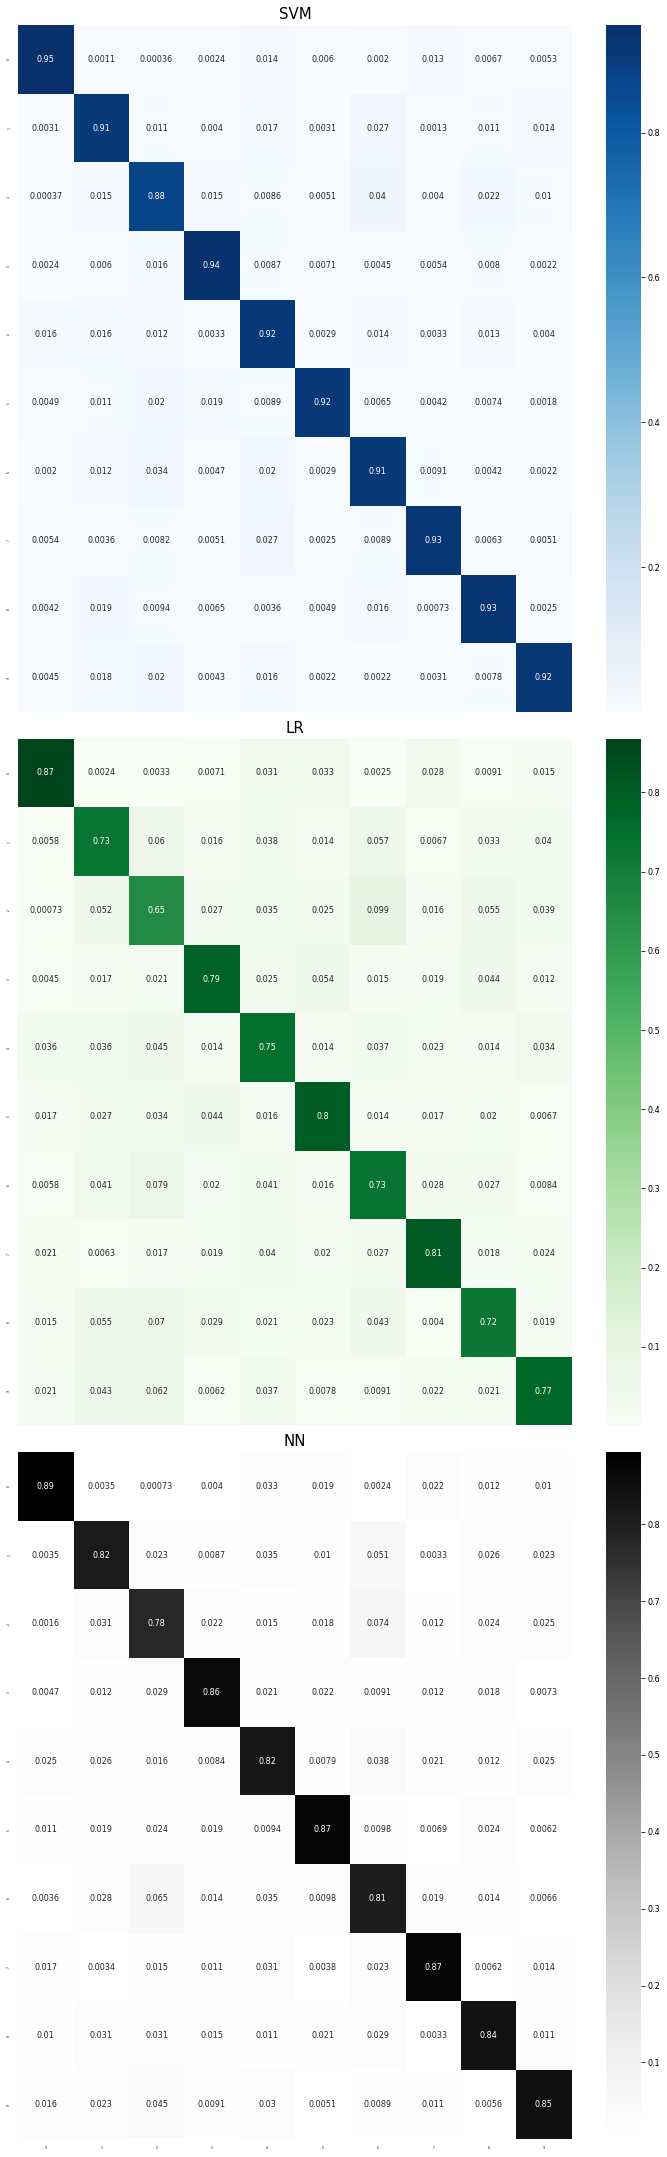

In [24]:
import seaborn as sn

fig, axs = plt.subplots(nrows = 3, ncols = 1, sharey=True, sharex=True, figsize = (10,30))
plt.rcParams['font.size'] = '8'
axs[0].tick_params(axis='both', labelsize=3)
axs[1].tick_params(axis='both', labelsize=3)
axs[2].tick_params(axis='both', labelsize=3)
axs[0].set_title('SVM', fontsize=15)
axs[1].set_title( 'LR', fontsize=15)
axs[2].set_title( 'NN', fontsize=15)
axs[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
axs[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
axs[2].tick_params(axis = "x", which = "both", bottom = False, top = False)
axs[0].tick_params(axis = "y", which = "both", right = False, left = False)
axs[1].tick_params(axis = "y", which = "both", right = False, left = False)
axs[2].tick_params(axis = "y", which = "both", right = False, left = False)

df_cm = pd.DataFrame(confusion_SVM_n, index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Blues", ax = axs[0])

df_cm = pd.DataFrame(confusion_LR_n, index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Greens", ax = axs[1])

df_cm = pd.DataFrame(confusion_LNN_n, index = [i for i in u], columns = [i for i in u])
sn.heatmap(df_cm, annot=True, cmap="Greys", ax = axs[2])

plt.tight_layout()

plt.show()
